<a href="https://colab.research.google.com/github/Baldros/Livros-IA/blob/main/1.%20Lab.%20Capitulo%20(em%20R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    O livro An Introduction to Statistical Learning, além da teória matemática,
    possui também exemplos de código no final de todos os seus capítulos. A
    ideia aqui é abordar o laboratório de código escrito no livro.

    A ideia aqui não é simplesmente copiar o que o livro faz, mas sim
    usar o que o livro apresenta como pontapé inicial para explorar o
    conjunto de dados e as possibilidades além do que o livro apresenta:

# Preparando ambiente:

    O livro começa nos ensinando a importar bibliotecas em R e para isso
    ulitizaremos a função library(), todavia algumas bibliotecas não estão
    disponíveis, deste modo devemos baixa-las com a função install.packages().

In [2]:
# Instalando biblioteca:
install.packages('ISLR2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# Importando dependências:
library(MASS)
library(ISLR2)
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Regressão Linear:

    O primieiro capítulo trata de Regressão Linear e para isso utiliza o
    dataset do Boston, um dataset sobre o mercado imobiliário da cidade de
    Boston.

In [4]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


    Note que não precisei baixar os dados, ou seja, a própria
    biblioteca já possui esse dataframe com esse conjunto de
    dados, o que facilita bastante nossa vida.

In [9]:
# Help no R:
?Boston

In [18]:
# Checando sumário:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [19]:
# Checando informação das colunas:
str(Boston)

'data.frame':	506 obs. of  13 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


    Podemos então partir para a regressão. O R, diferente do python, já vem
    com muitos métodos estatísticos já pronto, sem precisar importar coisas
    como sklearn ou outras bibliotecas de Machine Learning.

    Aqui, basicamente vaos utilizar uma função nativa para a maioria dos
    processos estatísticos e, tendo em vista que o básico de Machine Learning
    são métodos estatísticos, isso nos facilitará bastante.

    Existem duas formas de se escrever esse código:

**Definindo o conjunto de dados Previamente**

In [23]:
# Ajustando modelo:
attach(Boston) # Definindo o conjunto de dados previamente
lm.fit <- lm(medv ~ lstat)

**Definindo o conjunto de dados na própria função do modelo**

In [24]:
# Ajustando o modelo:
 lm.fit <- lm(medv ~ lstat, data = Boston)

    Com o modelo treinado, ou seja, a função objetivo otimizada, podemos
    checar os valores achados pós treinamento do modelo.

In [26]:
# Checando informações básicas do modelo:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [27]:
# Checando mais informações do modelo:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


    Podemos usar a função names() para descobrir quais outras partes da
    informação names() estão armazenadas em lm.fit. Embora possamos extrair
    essas quantidades pelo nome – por ex. lm.fit$coeficientes — é mais
    seguro usar o extrator funções como coef() para acessá-los.

In [28]:
# Outras informações:
 names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [30]:
# Informação de coeficientes:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

    Só possui dois coeficientes porque, por obvio, estamos numa
    situação de regressão linear.

    Podemos também obter um intervalo de confiança para as estimativas
    do coeficiente de forma bem fácil e prática.

In [31]:
# Intervalo de confiança:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


    Também podemos usar a propria funçaõ que utilizamos para predizer, para
    produzir intervalos de confiança e intervalos de previsão para a previsão
    de medv para um determinado valor de lstat.

In [35]:
# Gerando previsões de intervalo de confiança para os valores de "lstat" especificados:
predict(lm.fit, data.frame(lstat = (c(5, 10, 15))), interval = "confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [34]:
# Gerando previsões de intervalo de predição "lstat" especificados:
predict(lm.fit, data.frame(lstat = (c(5, 10, 15))), interval = "prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


    Note que o vetor c(5, 10, 15) está sendo usado para fornecer os valores
    específicos de "lstat" para os quais queremos fazer as previsões. Esses
    valores são apenas exemplos e podem ser substituídos por qualquer conjunto
    de valores para os quais desejamos obter previsões a partir do modelo de
    regressão linear ajustado. Por isso ele está dando apenas 3 valores como
    resposta... São apenas 3 valores fornecidos como entrada.

**Visualização**

    O tipo de gráfico utilizado para relacionar duas variáveis quantitativas,
    ou seja, duas variáveis no contínuo, contuma ser o scatterplot, ou seja
    o gráfico de dispersão.

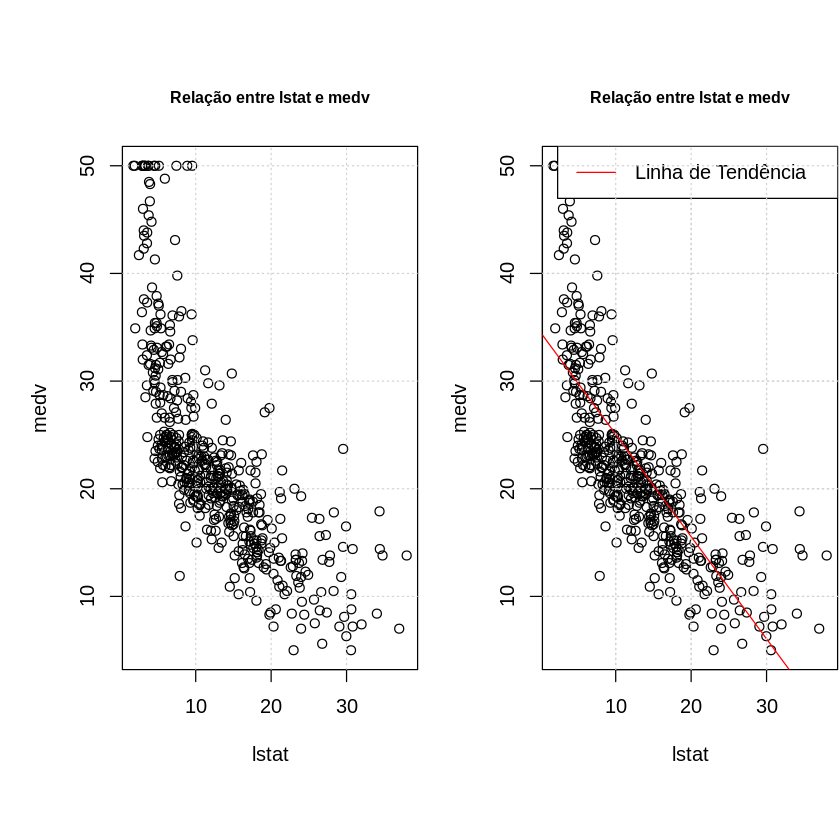

In [95]:
# Ajustando divisão e tamnhado do plot:
par(mfrow = c(1, 2), mar = c(5, 5, 4, 0) + 0.1, oma = c(2, 0, 2, 0))

# Definindo o primeiro gráfico:
plot(Boston$lstat, Boston$medv, # Colunas
     xlab = "lstat", ylab = "medv", # Eixos
     main = "Relação entre lstat e medv", # Titulo
     cex.main = 0.8) # reduzindo o tamanho do título
grid() # Grid de fundo

#Definindo o segundo gráfico:
plot(Boston$lstat, Boston$medv, # Colunas
     xlab = "lstat", ylab = "medv", # Eixos
     main = "Relação entre lstat e medv", # Titulo
     cex.main = 0.8) # reduzindo o tamanho do título
grid()

# Legenda da Reta:
legend("topright", legend = "Linha de Tendência", col = "red", lty = 1)

# Reta da Regressão Ajustada:
abline(lm.fit, col = "red")
grid() # Grid de fundo

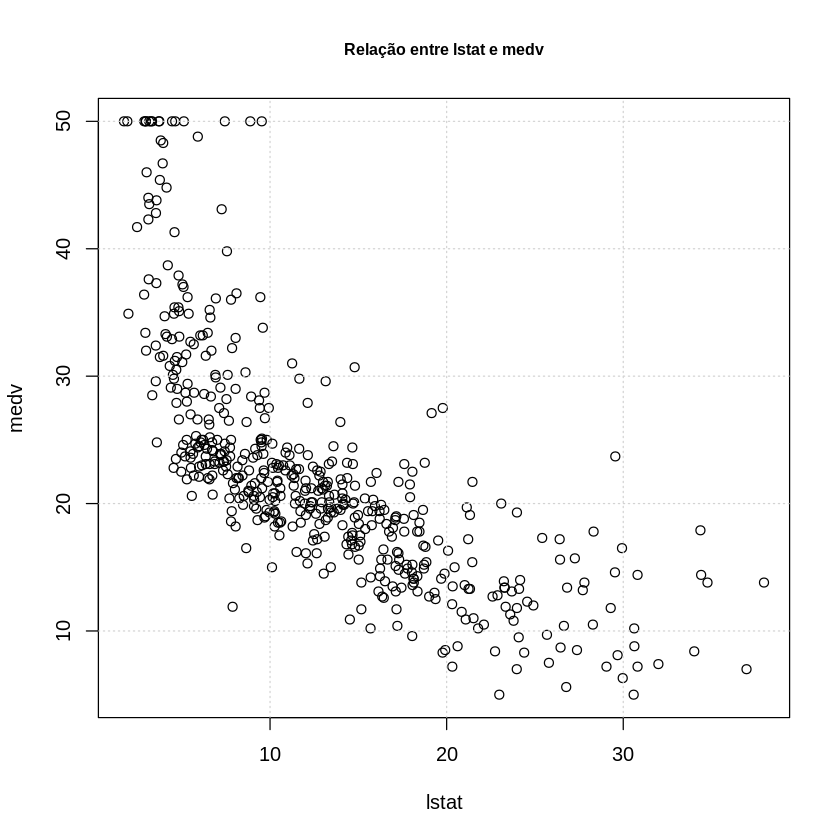

In [96]:
# Plotando o gráfico de visualização::
plot(Boston$lstat, Boston$medv,
     xlab = "lstat", ylab = "medv",
     main = "Relação entre lstat e medv", # sem título
     cex.main = 0.8) # reduzindo o tamanho do título
grid()

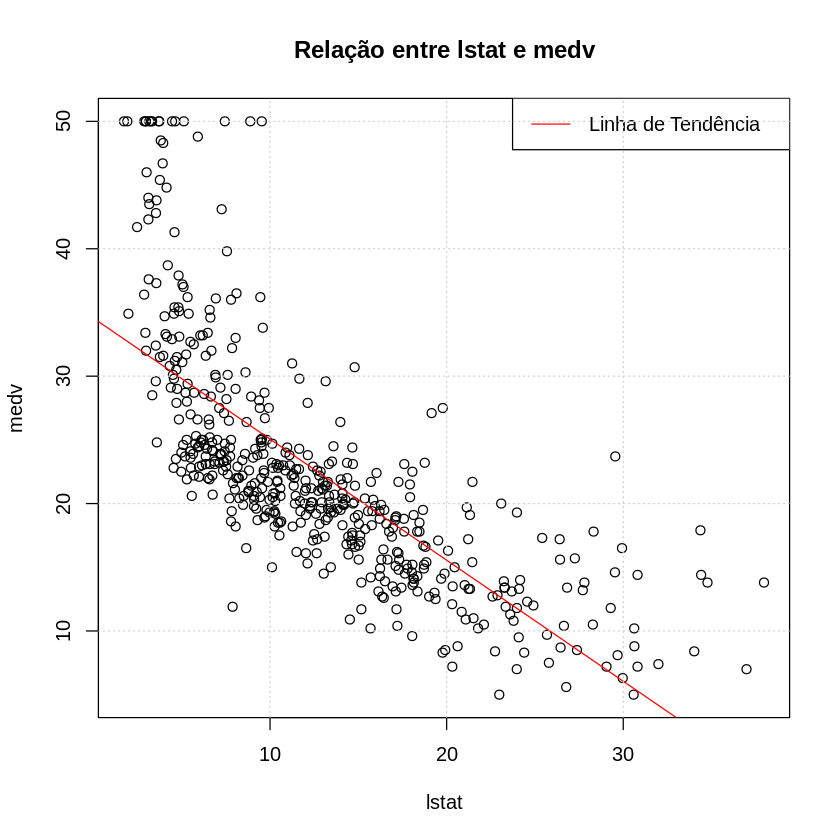

In [37]:
# Plotando gráfico com linha de tendencia:
plot(Boston$lstat, Boston$medv,
     xlab = "lstat", ylab = "medv",
     main = "Relação entre lstat e medv")

# Adicionando uma linha de tendência linear
abline(lm(medv ~ lstat, data = Boston), col = "red")

# Adicionando uma legenda
legend("topright", legend = "Linha de Tendência", col = "red", lty = 1)

# Adicionando grade ao gráfico
grid()

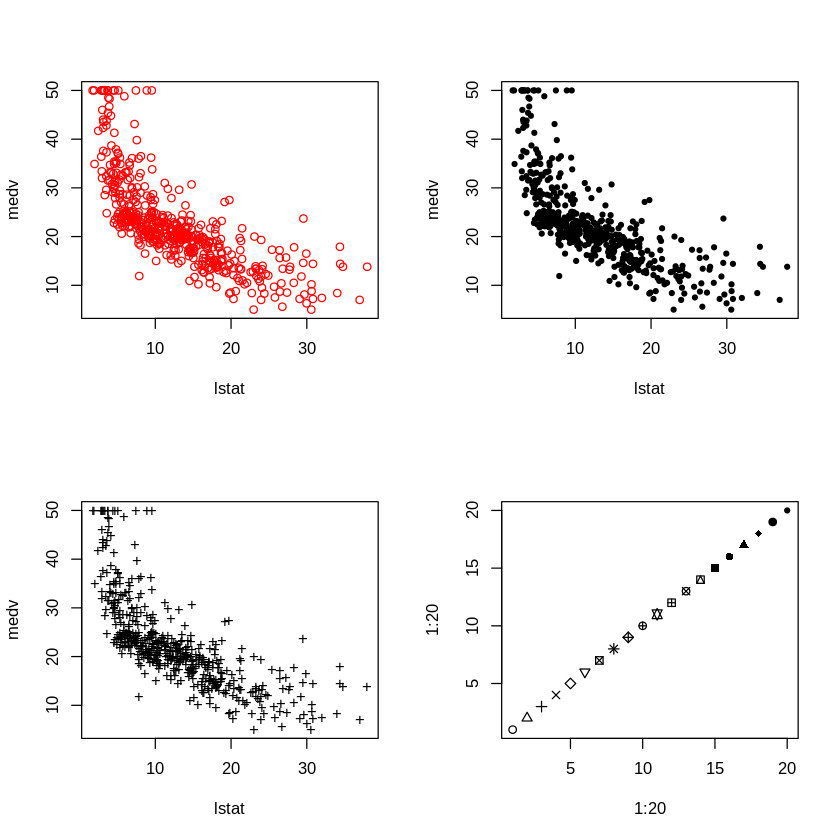

In [99]:
# Ajustando plotes conjuntos:
par(mfrow=c(2,2))

# Gerando outras visualizações:
plot(lstat, medv, col = "red")
plot(lstat, medv, pch = 20)
plot(lstat, medv, pch = "+")
plot(1:20, 1:20, pch = 1:20)

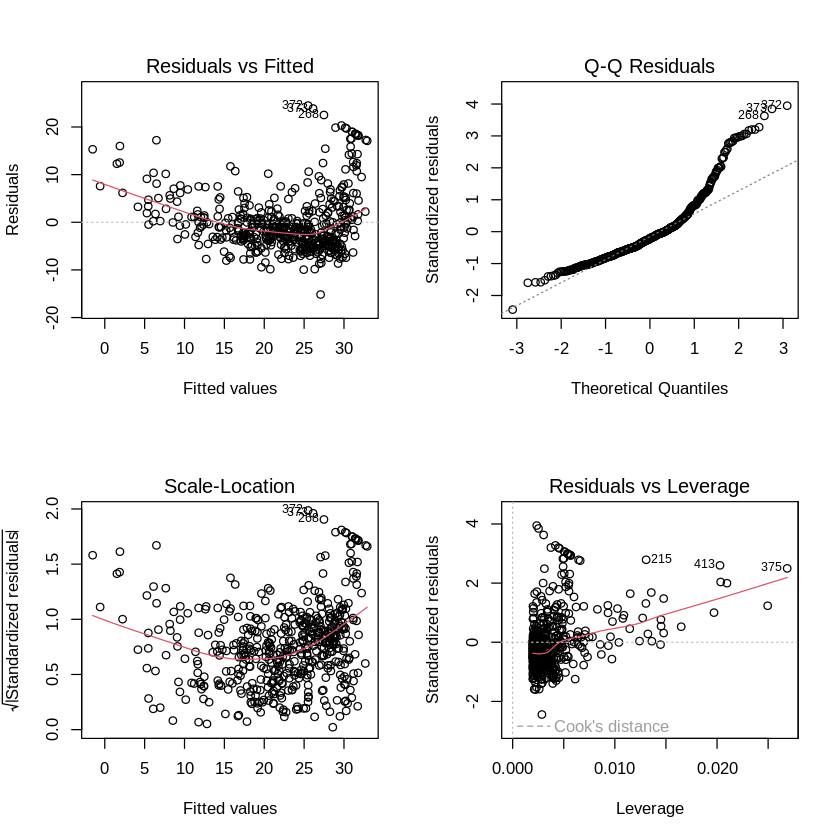

In [100]:
# Plotando as informações:
par(mfrow = c(2, 2))
plot(lm.fit)

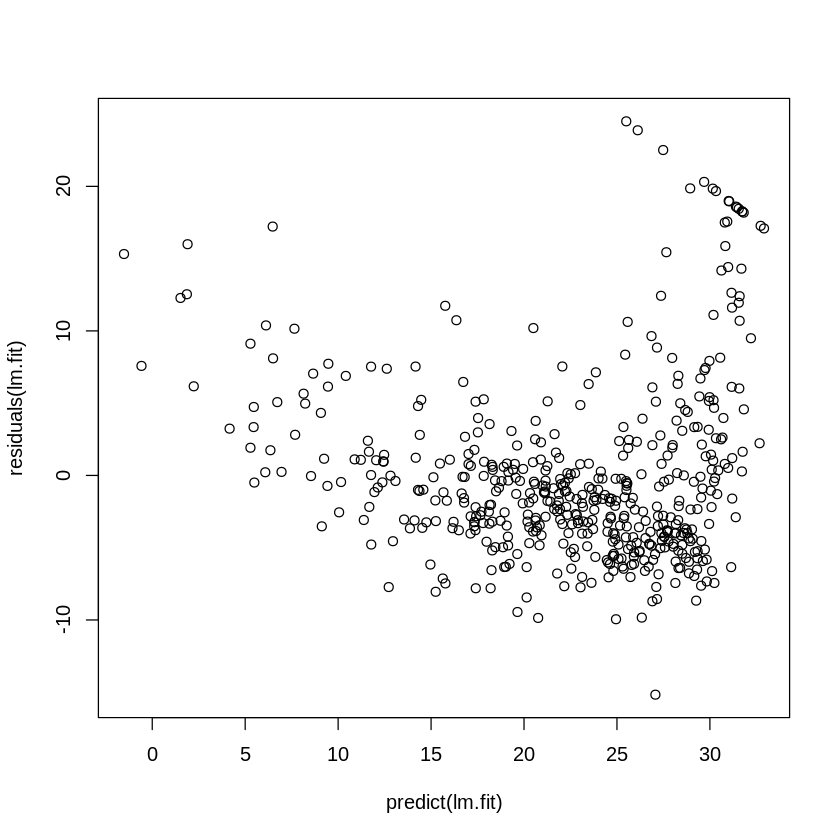

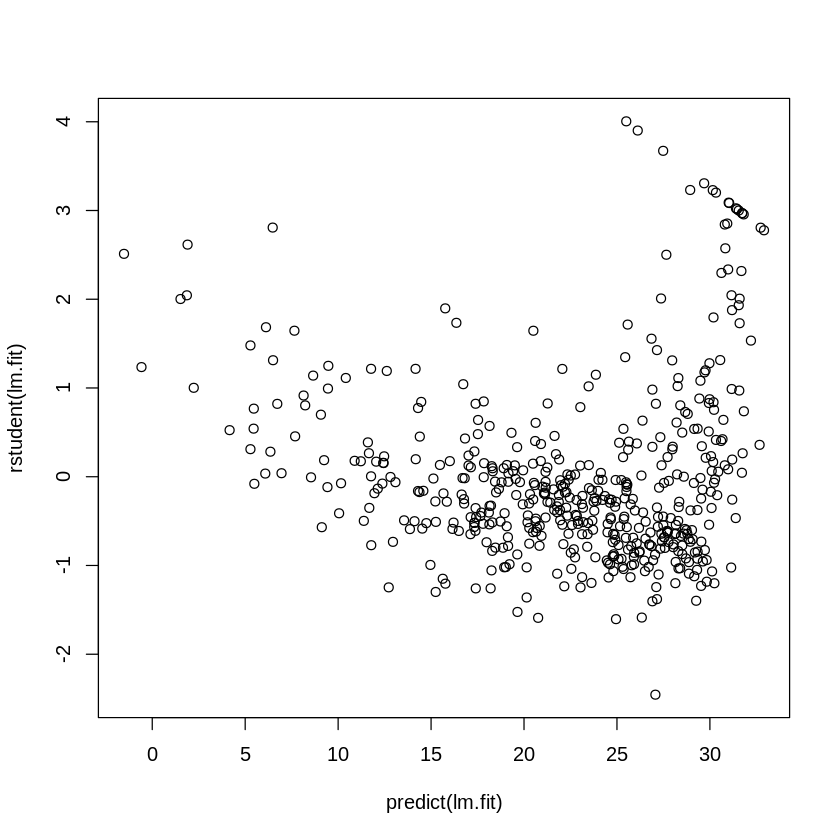

In [101]:
# Plotando Resíduos:
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

    Com base nos gráficos residuais, há alguma evidência de não linearidade.
    As estatísticas de alavancagem podem ser calculadas para qualquer número
    de preditores usando o função hatvalues().

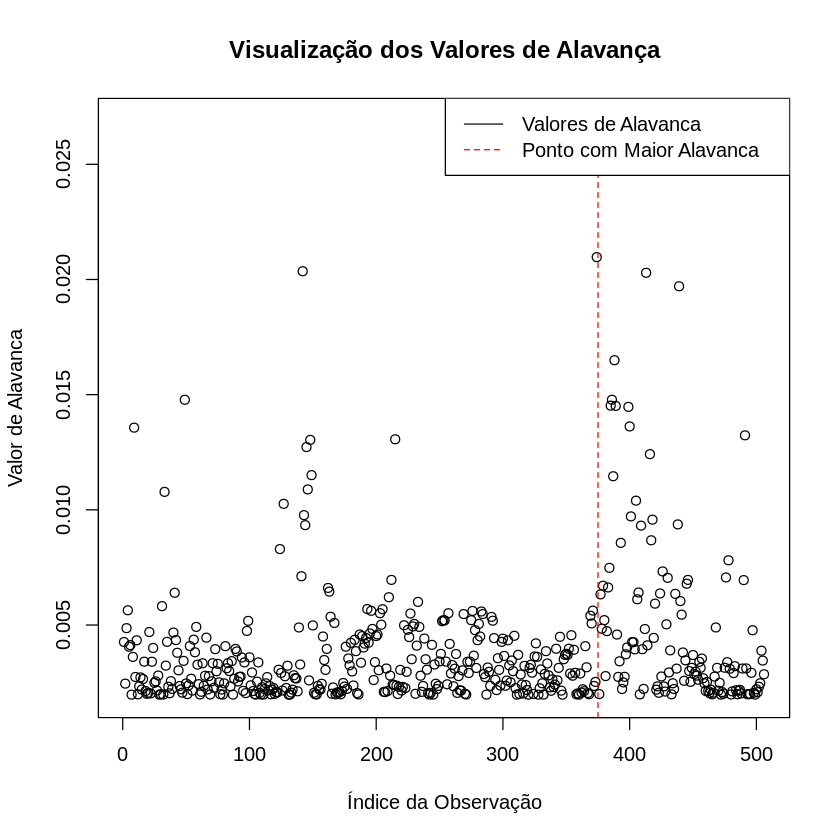

In [103]:
# Plot dos valores de alavanca
plot(hatvalues(lm.fit),
     xlab = "Índice da Observação",
     ylab = "Valor de Alavanca",
     main = "Visualização dos Valores de Alavança")

# Identificando o índice do ponto com maior valor de alavanca
ponto_max_alavanca <- which.max(hatvalues(lm.fit))

# Adicionando uma linha vertical para destacar o ponto com o maior valor de alavanca
abline(v = ponto_max_alavanca, col = "red", lty = 2)

# Adicionando uma legenda
legend("topright",
       legend = c("Valores de Alavanca", "Ponto com Maior Alavanca"),
       col = c("black", "red"),
       lty = c(1, 2))

    A função which.max() identifica o índice do maior elemento de um
    vetor which.max(). Neste caso, diz-nos qual observação tem a maior
    alavancagem estatística.